In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
!wget https://raw.githubusercontent.com/vanessagiovani/COMP6577/master/insurance.csv

1.

In [9]:
data = pd.read_csv("insurance.csv")
print(data)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       0  16884.92400
1      18    2  33.770         1       0       2   1725.55230
2      28    2  33.000         3       0       2   4449.46200
3      33    2  22.705         0       0       1  21984.47061
4      32    2  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    2  30.970         3       0       1  10600.54830
1334   18    1  31.920         0       0       3   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       0   2007.94500
1337   61    1  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


Univariate Linear Regression

In [35]:
X = data[["smoker"]]
Y = data["charges"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

In [36]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0  : ", LRM.intercept_)
print("theta 1  : ", LRM.coef_)
print("R2 Score : ", r2_score(YTest, prediction))
print("Error    : ", mean_squared_error(YTest, prediction))

theta 0  :  8425.39437700938
theta 1  :  [23766.93850806]
R2 Score :  0.6410811859339869
Error    :  49706062.32829257


Multivariate Linear Regression

In [37]:
X = data[["age", "children", "smoker"]]
Y = data["charges"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

In [38]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0    : ", LRM.intercept_)
print("theta 1-3  : ", LRM.coef_)
print("R2 Score   : ", r2_score(YTest, prediction))
print("Error      : ", mean_squared_error(YTest, prediction))

theta 0    :  -2551.9395675758606
theta 1-3  :  [  268.40175666   363.33852694 23923.74561345]
R2 Score   :  0.7495731761314083
Error      :  40098919.890645966


Multivariate Linear Regression (normalization)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def costFunction(X, Y, theta):
    h = np.dot(X, theta) - Y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J
    
def gradientDescent(X, Y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0]) * np.dot(X.T, (np.dot(X, theta) - Y)))   
        J_history[i] = costFunction(X, Y, theta)
    return theta, J_history

def plotCost():
    plt.figure()
    plt.plot(np.arange(num_iters), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

def featureNormalisation(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X)
    XNorm = (X - mu) / sigma
    return XNorm, mu, sigma



Charges for univariate

In [40]:
nonSmoker = theta[0] + 0 * theta[1]
smoker = theta[0] + 1 * theta[1]

print("Smoker fee     : %.2f" % smoker)
print("Non Smoker fee : %.2f" % nonSmoker)

Smoker fee     : 17011.87
Non Smoker fee : 13183.23


[13183.22918068  3801.96731078   591.35041944  9554.60479202]


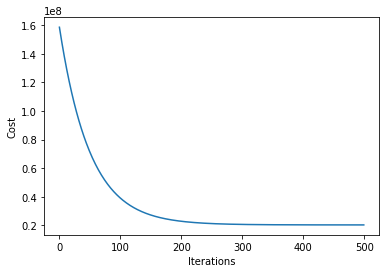

In [41]:
X = data[["age", "children", "smoker"]]
Y = data["charges"]
XTrain, mu, sigma = featureNormalisation(X)
XTrain = np.hstack((np.ones((XTrain.shape[0], 1)), XTrain))
theta = np.zeros(4)
alpha = 0.01
num_iters = 500
theta, J_history = gradientDescent(XTrain, Y, theta, alpha, num_iters)
print(theta)
plotCost()

Charges for multivariate

In [44]:
age = [16, 20, 40, 50]
children = [1, 2, 0, 3]
smoker = [1, 1, 0, 1]
charges = np.zeros(4)
print(len(age))
for i in range(len(age)):
    age[0] = (age[0] - mu[0]) / sigma[0]
    children[i] = (children[i] - mu[1]) / sigma[1]
    smoker[i] = (smoker[i] - mu[2]) / sigma[2]
    charges[i] = theta[0] + theta[1] * age[i] + theta[2] * children[i] + theta[3] * smoker[i]
    print("Charges person ", i + 1 , "is %.2f" % charges[i])

4
Charges person  1 is 25682.58
Charges person  2 is 108494.90
Charges person  3 is 159876.00
Charges person  4 is 223044.65


The difference between univariate and multivariate models are quite shown in the result. While univariate calculates using single X, multivariate can calculates more than one variable. For univariate, tere's only 2 result: smoker and non smoker fee where x as the smoker and y as the charges. For multivariate, it's kind of like a case where the result calculate charges from their age, children(s), and are a smoker or not. The more value from the three x variables, then the charges will be more larger.